C:\Users\mied1\AppData\Local\Temp\ipykernel_20868\3602470534.py:41: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Clean = pd.read_csv(file)


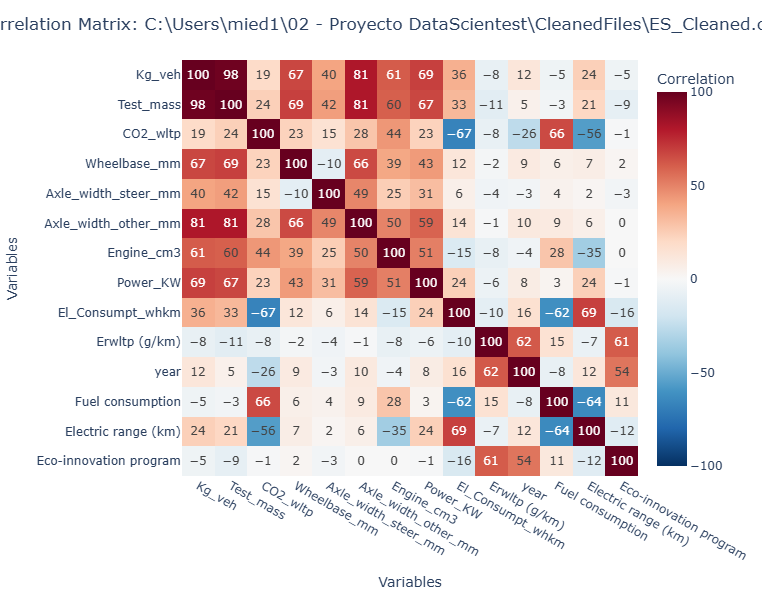

 Best correlated fields:  CO2_wltp               100
El_Consumpt_whkm        67
Fuel consumption        66
Electric range (km)     56
Engine_cm3              44
Axle_width_other_mm     28
year                    26
Test_mass               24
Wheelbase_mm            23
Power_KW                23
Name: CO2_wltp, dtype: int32


C:\Users\mied1\AppData\Local\Temp\ipykernel_20868\3602470534.py:41: DtypeWarning:

Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.



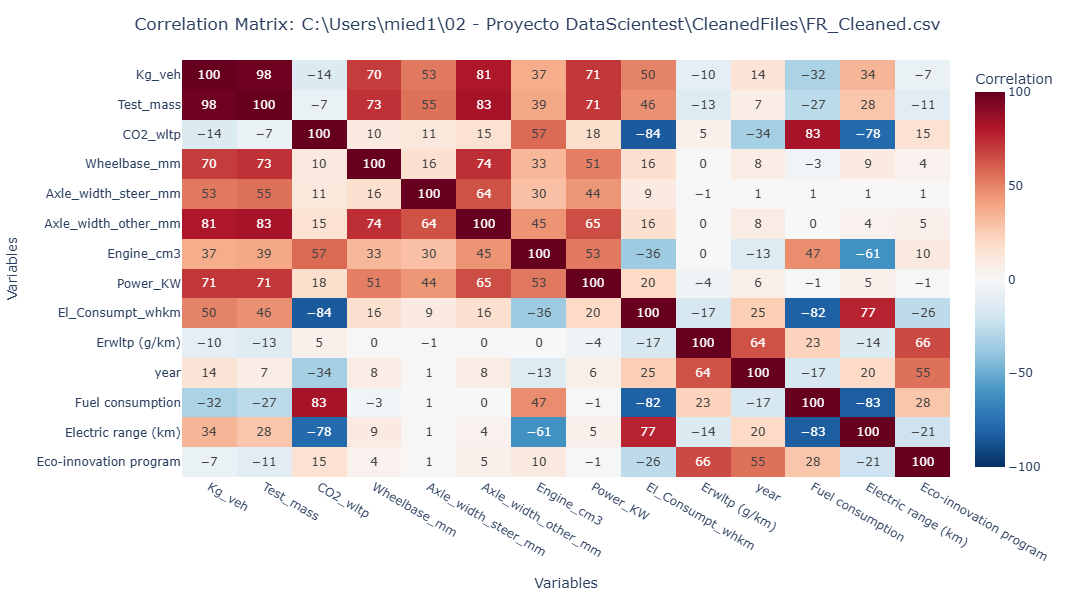

 Best correlated fields:  CO2_wltp                  100
El_Consumpt_whkm           84
Fuel consumption           83
Electric range (km)        78
Engine_cm3                 57
year                       34
Power_KW                   18
Axle_width_other_mm        15
Eco-innovation program     15
Kg_veh                     14
Name: CO2_wltp, dtype: int32


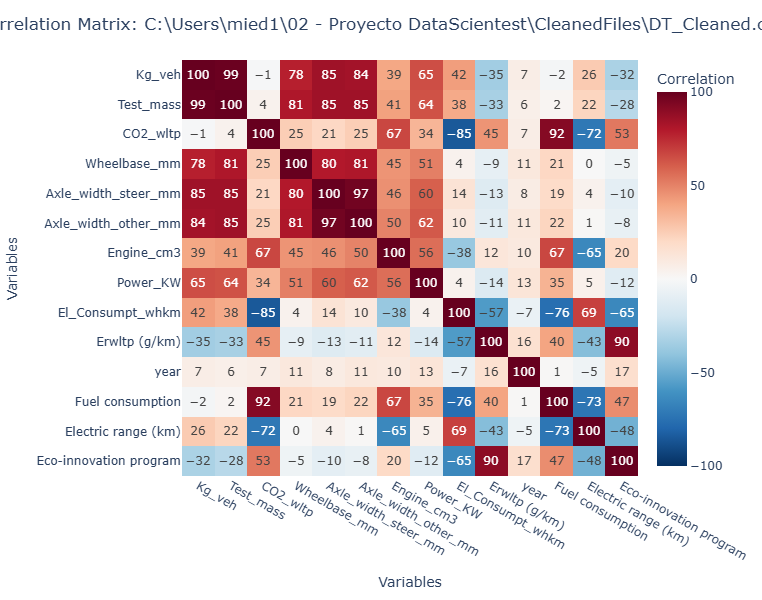

 Best correlated fields:  CO2_wltp                  100
Fuel consumption           92
El_Consumpt_whkm           85
Electric range (km)        72
Engine_cm3                 67
Eco-innovation program     53
Erwltp (g/km)              45
Power_KW                   34
Wheelbase_mm               25
Axle_width_other_mm        25
Name: CO2_wltp, dtype: int32


C:\Users\mied1\AppData\Local\Temp\ipykernel_20868\3602470534.py:41: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



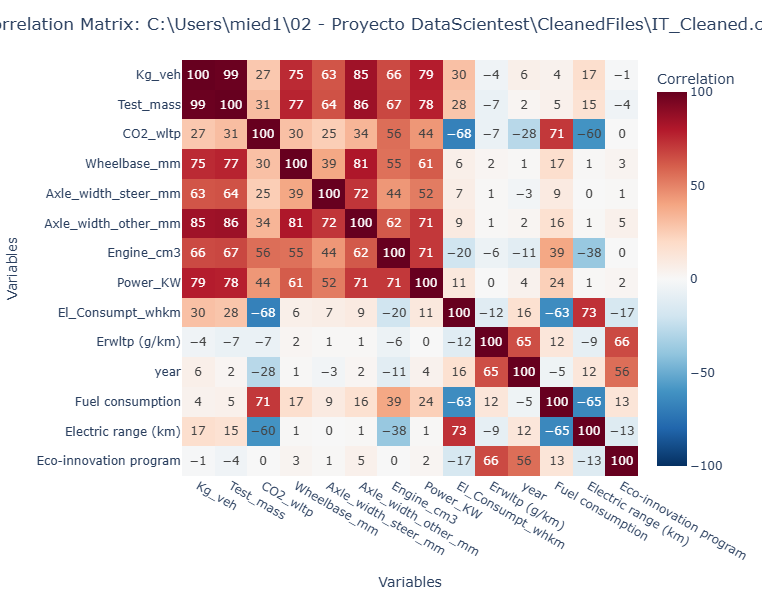

 Best correlated fields:  CO2_wltp               100
Fuel consumption        71
El_Consumpt_whkm        68
Electric range (km)     60
Engine_cm3              56
Power_KW                44
Axle_width_other_mm     34
Test_mass               31
Wheelbase_mm            30
year                    28
Name: CO2_wltp, dtype: int32


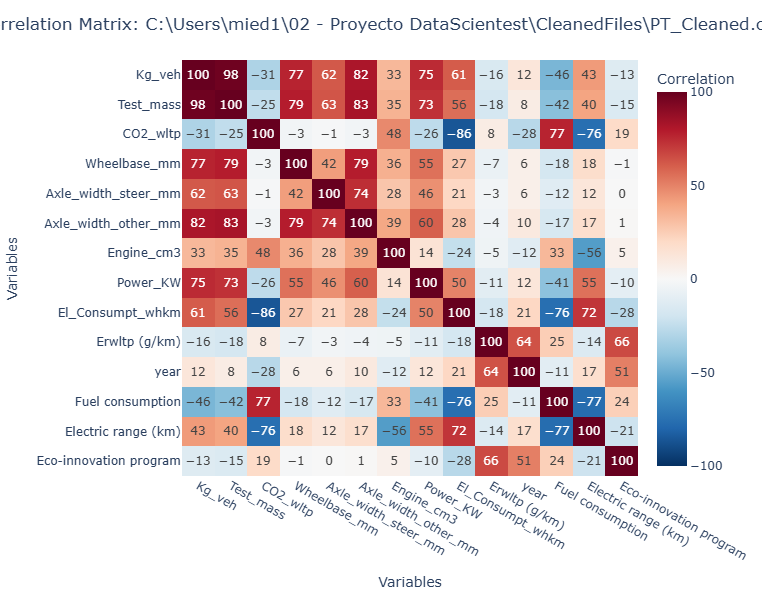

 Best correlated fields:  CO2_wltp                  100
El_Consumpt_whkm           86
Fuel consumption           77
Electric range (km)        76
Engine_cm3                 48
Kg_veh                     31
year                       28
Power_KW                   26
Test_mass                  25
Eco-innovation program     19
Name: CO2_wltp, dtype: int32


C:\Users\mied1\AppData\Local\Temp\ipykernel_20868\3602470534.py:41: DtypeWarning:

Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.



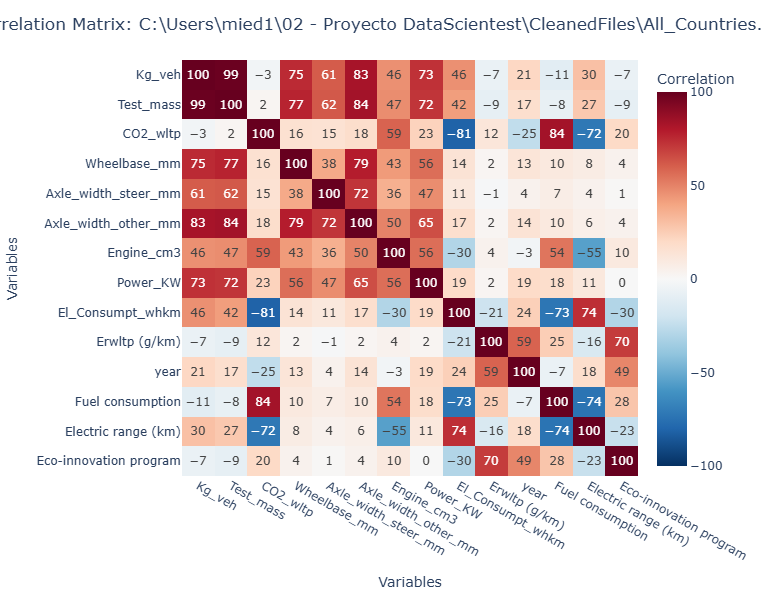

 Best correlated fields:  CO2_wltp                  100
Fuel consumption           84
El_Consumpt_whkm           81
Electric range (km)        72
Engine_cm3                 59
year                       25
Power_KW                   23
Eco-innovation program     20
Axle_width_other_mm        18
Wheelbase_mm               16
Name: CO2_wltp, dtype: int32


In [1]:
#################################################################################
###                    CO2_CorrelationGLOBAL 
###          Create a CORRELATION Matrix by Country.
###   -  Calculation & visualization Correlation Matrix by Country + Goblal one
###      Input: Cleaned files, one by country. 
###      Output: CoorMatrix_'+V_Country+'.csv'  File with correlation values
###   Involved Funtions:  "Func_Draw_correlation.ipynb"
###
###    Parametters 
###       NumV = Num of best correlated Variables to select 
###       Target_Var = Target Variable  (CO2_wltp or XXXXXXX)
###       V_Country = Got automaticaly from  files name. 
##################################################################################

import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%run "Func_Draw_correlation.ipynb"

# Read the CSV file into a DataFrame 
Cleanfiles = [r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\ES_Cleaned.csv",
                r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\FR_Cleaned.csv",
                r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\DT_Cleaned.csv",
                r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\IT_Cleaned.csv",
                r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\PT_Cleaned.csv",
                r"C:\Users\mied1\02 - Proyecto DataScientest\CleanedFiles\All_Countries.csv"]

NumV= 10

#----  Ready to run this code for different target variables, but now we are using only one. 
Taget_variables = ['CO2_wltp']

for Target_Var in Taget_variables:
    for file in Cleanfiles:
        
        df_Clean = pd.read_csv(file)
#------------------------------------------------------------------------------------
        df_Clean = df_Clean.drop("Em_on_target",axis=1)
        df_Clean = df_Clean.drop("CO2_Qtls", axis=1)
#------------------------------------------------------------------------------------

        if "Unnamed: 0" in df_Clean.columns:
            df_Clean = df_Clean.drop("Unnamed: 0", axis=1)
           
        V_title =  file    
        V_Country = file.rsplit("\\", 1)[-1]
      
# --Calling a funtion to plot heatmap correlation matrix   
        dfCorr = Func_Draw_correlation(df_Clean, V_title,Target_Var,NumV)    
        
# --Writing results in a file
        with open('CMatrix_'+V_Country+'_'+Target_Var+'.csv', 'w') as f:
             dfCorr.to_csv(f, header=f.tell()==0)    

# --Sound Alarm when process is ready
import winsound
winsound.PlaySound("C:\\Users\\mied1\\00 - Herramientas Python\\mixkit-intro-transition-1146.wav", winsound.SND_FILENAME)


Country      Constructor Veh_type      Version       Brand        Veh_Model  \
0      ES  FORD-WERKE GMBH      JU2  5AKPZNACJAH        FORD  TOURNEO COURIER   
1      ES    FCA ITALY SPA      952           5B  ALFA ROMEO           GIULIA   
2      ES          RENAULT       SD       4SDKJ5       DACIA            LOGAN   
3      ES          RENAULT       SD       4SDKJ5       DACIA            LOGAN   
4      ES          RENAULT       SD       4SDKJ5       DACIA            LOGAN   
5      ES    FCA ITALY SPA      940          23E  ALFA ROMEO   ALFA GIULIETTA   
6      ES    FCA ITALY SPA      940          23E  ALFA ROMEO   ALFA GIULIETTA   
7      ES    FCA ITALY SPA      940          23E  ALFA ROMEO   ALFA GIULIETTA   
8      ES    FCA ITALY SPA      940          23E  ALFA ROMEO   ALFA GIULIETTA   
9      ES    FCA ITALY SPA      940          23E  ALFA ROMEO   ALFA GIULIETTA   

  Veh_Category  Kg_veh    Test_mass    CO2_wltp  ...  Fuel_mode  Engine_cm3  \
0           M1  1324.0  1514.000000  156.000000  ...          M       998.0   
1           M1  1537.0  1731.025826  187.189696  ...          M      1995.0   
2           M1  1155.0  1293.983441  120.064368  ...          M      1461.0   
3           M1  1155.0  1293.983441  120.064368  ...          M      1461.0   
4           M1  1155.0  1293.983441  120.064368  ...          M      1461.0   
5           M1  1441.0  1492.709302  146.142857  ...          M      1598.0   
6           M1  1441.0  1492.709302  146.142857  ...          M      1598.0   
7           M1  1441.0  1492.709302  146.142857  ...          M      1598.0   
8           M1  1441.0  1492.709302  146.142857  ...          M      1598.0   
9           M1  1441.0  1492.709302  146.142857  ...          M      1598.0   

   Power_KW El_Consumpt_whkm Erwltp (g/km)  year  Fuel consumption  \
0      73.0              0.0           0.0  2019          5.414840   
1     147.0              0.0           0.0  2018          6.319864   
2      66.0              0.0           0.0  2018          5.901411   
3      66.0              0.0           0.0  2018          5.901411   
4      66.0              0.0           0.0  2018          5.901411   
5      88.0              0.0           0.0  2018          6.319864   
6      88.0              0.0           0.0  2018          6.319864   
7      88.0              0.0           0.0  2018          6.319864   
8      88.0              0.0           0.0  2018          6.319864   
9      88.0              0.0           0.0  2018          6.319864   

   Electric range (km)  Eco-innovation program  CO2_wltp_quartiles  
0                  0.0                       0      (146.0, 456.0]  
1                  0.0                       0      (146.0, 456.0]  
2                  0.0                       0    (118.149, 132.0]  
3                  0.0                       0    (118.149, 132.0]  
4                  0.0                       0    (118.149, 132.0]  
5                  0.0                       0      (146.0, 456.0]  
6                  0.0                       0      (146.0, 456.0]  
7                  0.0                       0      (146.0, 456.0]  
8                  0.0                       0      (146.0, 456.0]  
9                  0.0                       0      (146.0, 456.0]  

[10 rows x 24 columns]